In [ ]:
# read the .tiff image from the 
from PIL import Image
import numpy
im = Image.open('FLIR_534.tif')
imarray = numpy.array(im) 
a = imarray.shape

In [ ]:
imarray

array([[8209, 8191, 8190, ..., 8114, 8101, 8087],
       [8218, 8224, 8215, ..., 8072, 8070, 8090],
       [8236, 8232, 8244, ..., 8039, 8039, 8072],
       ...,
       [8027, 8022, 8017, ..., 8167, 8160, 8163],
       [8032, 8028, 8024, ..., 8169, 8163, 8158],
       [8037, 8038, 8030, ..., 8164, 8157, 8158]], dtype=uint16)

In [ ]:
a

(512, 640)

In [ ]:
# extracting the temperature of every pixel using the equation I_Celsius = I*0.04-273.15 in .tif image.
I_Celsius = imarray*0.04-273.15
I_Celsius

array([[55.21, 54.49, 54.45, ..., 51.41, 50.89, 50.33],
       [55.57, 55.81, 55.45, ..., 49.73, 49.65, 50.45],
       [56.29, 56.13, 56.61, ..., 48.41, 48.41, 49.73],
       ...,
       [47.93, 47.73, 47.53, ..., 53.53, 53.25, 53.37],
       [48.13, 47.97, 47.81, ..., 53.61, 53.37, 53.17],
       [48.33, 48.37, 48.05, ..., 53.41, 53.13, 53.17]])

In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = I_Celsius
# save to csv file
savetxt('data_conv.csv', data, delimiter=',')

In [ ]:
import pandas
df = pandas.read_csv('data_conv.csv')
df.head(5)

,5.521000000000003638e+01,5.449000000000000909e+01,5.445000000000004547e+01,5.425000000000005684e+01,5.361000000000001364e+01,5.349000000000000909e+01,5.337000000000000455e+01,5.357000000000005002e+01,5.341000000000002501e+01,5.329000000000002046e+01,5.345000000000004547e+01,5.297000000000002728e+01,5.249000000000000909e+01,5.177000000000003865e+01,5.161000000000001364e+01,5.185000000000002274e+01,5.153000000000002956e+01,5.161000000000001364e+01.1,5.245000000000004547e+01,5.369000000000005457e+01,5.557000000000005002e+01,5.649000000000000909e+01,5.665000000000003411e+01,5.717000000000001592e+01,5.713000000000005230e+01,5.725000000000005684e+01,5.697000000000002728e+01,5.585000000000002274e+01,5.533000000000004093e+01,5.501000000000004775e+01,5.497000000000002728e+01,5.433000000000004093e+01,5.333000000000004093e+01,5.257000000000005002e+01,5.241000000000002501e+01,5.229000000000002046e+01,5.269000000000005457e+01,5.353000000000002956e+01,5.437000000000000455e+01,5.617000000000001592e+01,...,4.325000000000005684e+01,4.281000000000000227e+01.1,4.241000000000002501e+01,4.277000000000003865e+01.2,4.309000000000003183e+01.1,4.349000000000000909e+01.2,4.349000000000000909e+01.3,4.397000000000002728e+01,4.433000000000004093e+01,4.477000000000003865e+01,4.537000000000000455e+01.1,4.637000000000000455e+01,4.801000000000004775e+01,5.053000000000002956e+01.1,5.197000000000002728e+01.2,5.309000000000003183e+01,5.313000000000005230e+01.1,5.261000000000001364e+01,5.205000000000001137e+01,5.037000000000000455e+01.1,4.933000000000004093e+01,4.869000000000005457e+01,4.733000000000004093e+01.1,4.593000000000000682e+01.1,4.489000000000004320e+01.1,4.361000000000001364e+01.1,4.325000000000005684e+01.1,4.301000000000004775e+01.1,4.261000000000001364e+01.3,4.313000000000005230e+01,4.353000000000002956e+01.2,4.433000000000004093e+01.1,4.593000000000000682e+01.2,4.797000000000002728e+01,5.009000000000003183e+01.1,5.141000000000002501e+01.1,5.169000000000005457e+01.1,5.141000000000002501e+01.2,5.089000000000004320e+01,5.033000000000004093e+01.2
0,55.57,55.81,55.45,55.61,55.33,54.89,54.85,54.81,54.93,54.65,54.53,54.01,53.45,52.37,52.49,52.33,52.33,52.05,52.65,53.61,54.93,56.53,57.57,57.69,57.93,57.17,56.69,56.09,55.09,54.77,54.29,53.81,53.69,52.85,52.57,52.49,52.73,53.33,53.97,55.53,...,43.13,42.77,42.81,42.93,43.25,43.57,43.89,44.33,44.97,45.29,45.85,46.53,48.33,50.77,51.97,53.41,53.49,53.05,52.37,50.57,48.69,48.09,46.61,45.57,44.77,43.97,43.25,42.65,42.89,43.01,44.01,44.49,47.37,49.81,51.65,51.65,51.21,49.73,49.65,50.45
1,56.29,56.13,56.61,56.61,57.57,56.69,56.57,55.97,56.17,55.93,55.61,55.17,54.37,53.49,53.01,53.25,53.49,53.45,54.01,54.69,55.73,56.57,57.53,58.25,58.33,57.53,56.45,55.61,55.05,54.25,54.21,54.01,53.53,53.21,53.09,53.01,53.25,53.49,54.09,54.53,...,43.09,42.73,42.57,43.29,43.21,43.81,44.29,44.73,45.69,45.85,46.41,47.09,48.89,50.41,52.65,53.85,53.65,53.13,52.49,50.29,48.61,46.93,45.69,44.69,44.17,43.49,43.09,42.65,42.81,43.13,44.65,46.05,48.77,50.69,52.41,51.57,49.61,48.41,48.41,49.73
2,57.09,57.01,57.09,57.89,57.93,58.37,58.01,57.01,56.89,56.77,56.69,55.85,55.33,54.65,53.93,54.01,54.57,55.09,55.81,56.17,56.93,56.81,57.17,57.73,57.81,57.37,56.33,55.33,54.97,54.77,54.41,53.73,53.13,52.69,53.05,53.21,53.69,53.89,54.05,54.57,...,43.41,43.25,43.37,43.77,43.89,44.13,44.97,45.61,46.49,46.49,46.21,47.29,49.65,50.73,52.93,53.97,53.93,53.09,52.01,50.17,48.85,45.97,45.33,44.29,43.81,43.61,43.05,42.73,43.17,43.97,45.29,47.65,50.41,52.01,52.49,50.49,48.33,47.29,48.17,49.45
3,57.33,57.45,57.89,58.93,58.73,59.25,58.69,57.93,57.73,57.69,57.93,57.53,56.53,55.49,55.21,55.53,55.93,56.25,57.21,57.21,57.25,57.41,57.57,57.09,56.77,56.41,56.17,55.45,55.13,54.97,54.81,54.57,53.85,53.21,53.25,53.41,53.73,54.17,54.49,54.61,...,43.61,43.13,43.41,43.85,44.29,44.85,45.81,46.97,47.09,46.29,46.93,47.93,50.05,51.69,52.93,53.49,53.25,52.21,51.65,50.21,47.37,45.45,45.05,44.73,44.13,43.37,43.09,43.13,43.69,45.13,46.61,49.13,51.65,53.09,52.13,49.81,47.53,46.69,47.73,49.01

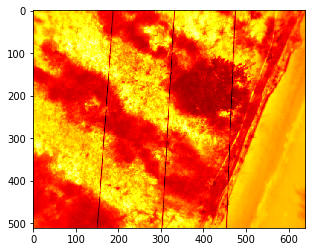

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

#a = np.random.random((16, 16))

plt.imshow(df, cmap='hot', interpolation='nearest')

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


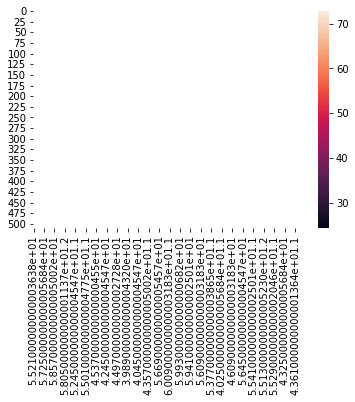

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
data = df
ax = sns.heatmap(data,linewidth = 1)
plt.show()

In [ ]:
import gdal # Import GDAL library
g = gdal.Open ("FLIR_534.tif") # Open the file
if g is None:
    print ("Could not open the file!")
geo_transform = g.GetGeoTransform ()
print (geo_transform)
print (g.RasterXSize, g.RasterYSize)

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
640 512


In [ ]:
g = gdal.Open ( "FLIR_534.tif" ) # Open original file
# Get the x, y and number of bands from the original file
x_size, y_size, n_bands = g.RasterXSize, g.RasterYSize, g.RasterCount
data = g.ReadAsArray ()
driver = gdal.GetDriverByName ( "HFA" ) # Get a handler to a driver
                                        # Maybe try "GeoTIFF" here
# Next line creates the output dataset with
# 1. The filename ("test_lc_h17v03.img")
# 2. The raster size (x_size, y_size)
# 3. The number of bands
# 4.The data type (in this case, Byte.
#     Other typical values might be gdal.GDT_Int16 
#     or gdal.GDT_Float32)

dataset_out = driver.Create ( "test_lc_h17v03.img", x_size, y_size, n_bands, \
                             gdal.GDT_Byte )
# Set the output geotransform by reading the input one
dataset_out.SetGeoTransform ( g.GetGeoTransform() )
# Set the output projection by reading the input one
dataset_out.SetProjection ( g.GetProjectionRef() )
# Now, get band # 1, and write our data array. 
# Note that the data array needs to have the same type
# as the one specified for dataset_out
dataset_out.GetRasterBand ( 1 ).WriteArray ( data )
# This bit forces GDAL to close the file and write to it
dataset_out = None

In [ ]:
!gdalinfo test_lc_h17v03.img

Driver: HFA/Erdas Imagine Images (.img)
Files: test_lc_h17v03.img
Size is 640, 512
Coordinate System is `'
Corner Coordinates:
Upper Left  (    0.0,    0.0)
Lower Left  (    0.0,  512.0)
Upper Right (  640.0,    0.0)
Lower Right (  640.0,  512.0)
Center      (  320.0,  256.0)
Band 1 Block=64x64 Type=Byte, ColorInterp=Undefined
  Description = Layer_1
  Metadata:
    LAYER_TYPE=athematic

